# Multinominal Regression

### Problem Statement 

    - Need to predict the type of program a student is in based on other attributes --> mdata.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Data Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
mdata = pd.read_csv ("~/desktop/Digi 360/Module 10/Dataset/mdata.csv",encoding='mac_roman')
mdata.head(5)

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [3]:
mdata = mdata.drop('Unnamed: 0', axis=1)
mdata.head()

,id,female,ses,schtyp,prog,read,write,math,science,honors
0,45,female,low,public,vocation,34,35,41,29,not enrolled
1,108,male,middle,public,general,34,33,41,36,not enrolled
2,15,male,high,public,vocation,39,39,44,26,not enrolled
3,67,male,low,public,vocation,37,37,42,33,not enrolled
4,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [4]:
mdata.isnull().sum()

id         0
female     0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
honors     0
dtype: int64

### Basic Visualization

<Figure size 720x432 with 0 Axes>

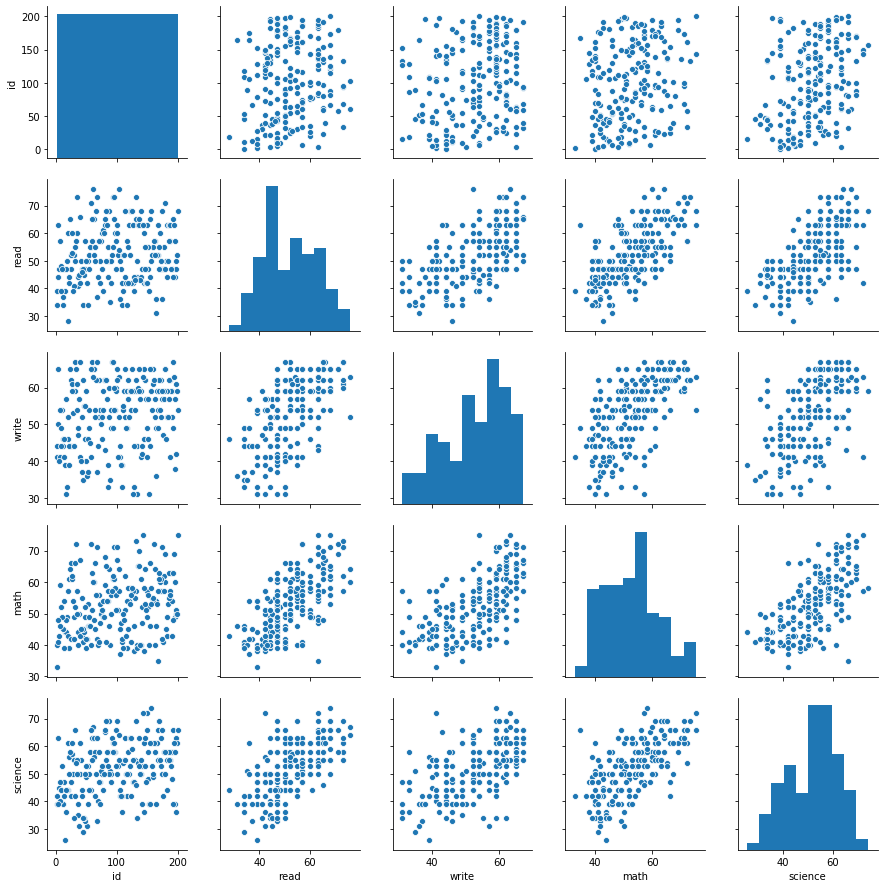

In [5]:
#Let's visulaize the numeric varibles using scatter plot
plt.figure(figsize = (10,6))
sns.pairplot(mdata)
plt.show()

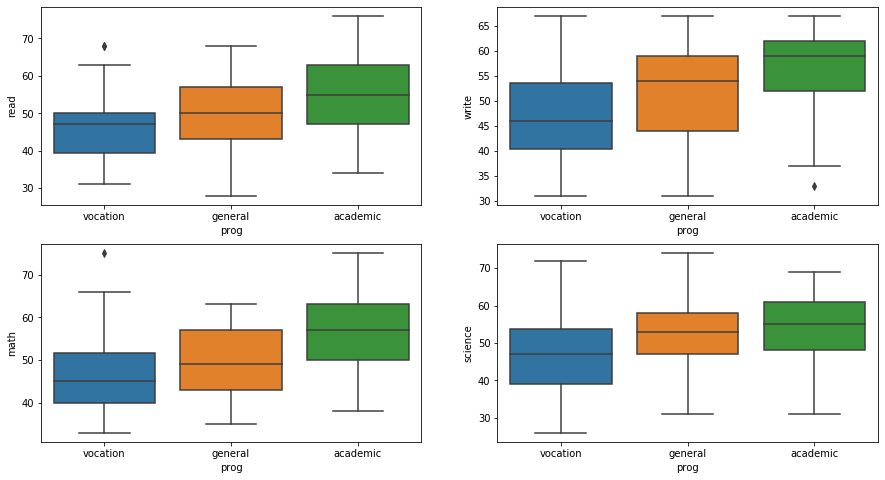

In [6]:
#Let's visualize the categorical varibles

plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.boxplot(x='prog',y='read',data=mdata)
plt.subplot(2,2,2)
sns.boxplot(x='prog',y='write',data=mdata)
plt.subplot(2,2,3)
sns.boxplot(x='prog',y='math',data=mdata)
plt.subplot(2,2,4)
sns.boxplot(x='prog',y='science',data=mdata)

plt.show()

### Data Preparation

In [7]:
print(mdata.female.value_counts())
print(mdata.ses.value_counts())
print(mdata.schtyp.value_counts())
print(mdata.honors.value_counts())

female    109
male       91
Name: female, dtype: int64
middle    95
high      58
low       47
Name: ses, dtype: int64
public     168
private     32
Name: schtyp, dtype: int64
not enrolled    147
enrolled         53
Name: honors, dtype: int64


In [8]:
#let's first convert female, schtyp and honors with label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mdata ['female'] = le.fit_transform(mdata['female'])
mdata ['schtyp'] = le.fit_transform(mdata['schtyp'])
mdata ['honors'] = le.fit_transform(mdata['honors'])

In [9]:
#let's now convert remaining categorical varibales to numeric values using get dummies

dummies = pd.get_dummies(mdata[['ses']],drop_first=True)
dummies.head()

,ses_low,ses_middle
0,1,0
1,0,1
2,0,0
3,1,0
4,0,1


In [10]:
#Let's concat dummies dataframe with original dataframe and drop the original columns

mdata = pd.concat([mdata, dummies], axis = 1)
mdata.head()

,id,female,ses,schtyp,prog,read,write,math,science,honors,ses_low,ses_middle
0,45,0,low,1,vocation,34,35,41,29,1,1,0
1,108,1,middle,1,general,34,33,41,36,1,0,1
2,15,1,high,1,vocation,39,39,44,26,1,0,0
3,67,1,low,1,vocation,37,37,42,33,1,1,0
4,153,1,middle,1,vocation,39,31,40,39,1,0,1


In [11]:
# Let's drop the original columns since they are already converted to numeric values.

mdata.drop(['ses'], axis = 1, inplace = True)
mdata.head()

,id,female,schtyp,prog,read,write,math,science,honors,ses_low,ses_middle
0,45,0,1,vocation,34,35,41,29,1,1,0
1,108,1,1,general,34,33,41,36,1,0,1
2,15,1,1,vocation,39,39,44,26,1,0,0
3,67,1,1,vocation,37,37,42,33,1,1,0
4,153,1,1,vocation,39,31,40,39,1,0,1


In [12]:
mdata.describe()

,id,female,schtyp,read,write,math,science,honors,ses_low,ses_middle
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.45500,0.840000,52.230000,52.775000,52.645000,51.850000,0.735000,0.235000,0.475000
std,57.879185,0.49922,0.367526,10.252937,9.478586,9.368448,9.900891,0.442441,0.425063,0.500628
min,1.000000,0.00000,0.000000,28.000000,31.000000,33.000000,26.000000,0.000000,0.000000,0.000000
25%,50.750000,0.00000,1.000000,44.000000,45.750000,45.000000,44.000000,0.000000,0.000000,0.000000
50%,100.500000,0.00000,1.000000,50.000000,54.000000,52.000000,53.000000,1.000000,0.000000,0.000000
75%,150.250000,1.00000,1.000000,60.000000,60.000000,59.000000,58.000000,1.000000,0.000000,1.000000
max,200.000000,1.00000,1.000000,76.000000,67.000000,75.000000,74.000000,1.000000,1.000000,1.000000


### Splitting Dataset to Train and Test

In [13]:
y = mdata.pop("prog")
X = mdata

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
X_train.head()

,id,female,schtyp,read,write,math,science,honors,ses_low,ses_middle
108,112,0,1,52,59,48,55,1,0,1
107,158,0,1,52,54,55,53,1,0,1
189,200,1,0,68,54,75,66,1,0,1
14,89,0,1,35,35,40,51,1,1,0
56,14,1,1,47,41,54,42,1,0,0


In [16]:
y_train.head()

108    academic
107     general
189    academic
14     vocation
56     academic
Name: prog, dtype: object

### Scaling

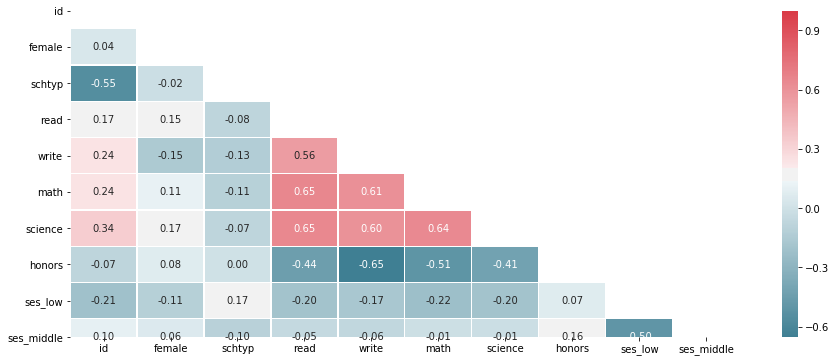

In [29]:
#Let's see the correlation among the varibales now

corr = X_train.corr()
fig, ax = plt.subplots(figsize=(15,6))
colormap = sns.diverging_palette(220,10, as_cmap = True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,cmap = colormap, linewidth=0.2, annot=True,fmt=".2f", mask=dropSelf)

plt.show()

Here we can see no independent variable is highly correlated.

In [17]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

### Building the Model

In [18]:
# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [19]:
# Train model
model = clf.fit(X_train_scale, y_train)

### Model Evolution

In [20]:
train_predict = model.predict(X_train_scale) # Train predictions 

In [21]:
# Train accuracy 
accuracy_score(y_train,train_predict)

0.65625

In [22]:
test_predict = model.predict(X_test_scale) # Test predictions

In [23]:
# Test accuracy 
accuracy_score(y_test,test_predict)

0.575

### Conclusion

    - Train accuracy of Multinomial model is 66%
    - Test accuracy of the model is 56%
    - We can improve the accuracy with transaformations or other boosting models whch we learn in next models